# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [4]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.2974010929396528, E_test is 0.2945771371635377


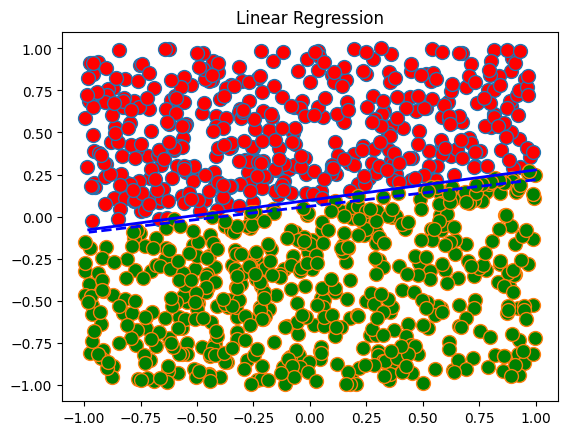

In [23]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
N = 1000 # number of data
E_train_sum = 0.0
E_test_sum = 0.0

for i in range(nRep):
    X, y, w_f = mkdata(N)
    w_g = linear_regression(X, y)
    # 划分训练集和测试集
    perm = np.random.permutation(N)
    nTrain = int(0.8 * N)
    idx_tr, idx_te = perm[:nTrain], perm[nTrain:]

    X_train, y_train = X[:, idx_tr], y[:, idx_tr]
    X_test,  y_test  = X[:, idx_te],  y[:, idx_te]
    w_train, w_test = linear_regression(X_train, y_train), linear_regression(X_test, y_test)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X_train))   # (P+1) x N
    E_train_sum += np.mean((w_train.T @ X_bias - y_train) ** 2)

    X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
    E_test_sum += np.mean((w_test.T @ X_test_bias - y_test) ** 2)

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.5392872937447843, E_test is 0.5342655953711369


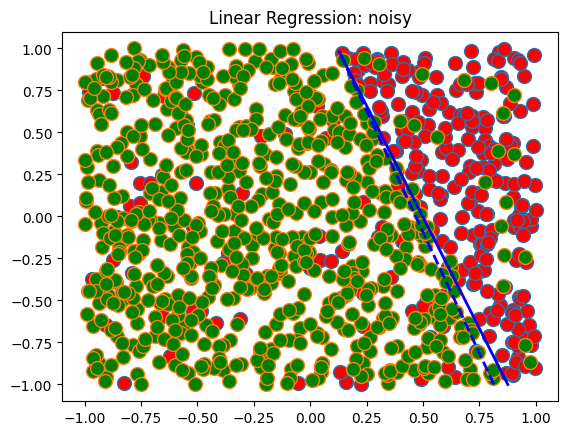

In [24]:

nRep = 1000; # number of replicates
N = 1000; # number of data
E_train_sum = 0.0
E_test_sum = 0.0

for i in range(nRep):
    X, y, w_f = mkdata(N, 'noisy')
    w_g = linear_regression(X, y)
    # 划分训练集和测试集
    perm = np.random.permutation(N)
    nTrain = int(0.8 * N)
    idx_tr, idx_te = perm[:nTrain], perm[nTrain:]

    X_train, y_train = X[:, idx_tr], y[:, idx_tr]
    X_test,  y_test  = X[:, idx_te],  y[:, idx_te]
    w_train, w_test = linear_regression(X_train, y_train), linear_regression(X_test, y_test)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X_train))   # (P+1) x N
    E_train_sum += np.mean((w_train.T @ X_bias - y_train) ** 2)

    X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
    E_test_sum += np.mean((w_test.T @ X_test_bias - y_test) ** 2)

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [94]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']     # X: P * N, y: 1 * N
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)  # w: (P+1) * 1

#print(X.shape, y.shape, X_test.shape, y_test.shape)
#TODO
# Compute training, testing error
X_bias = np.vstack((np.ones((1, X.shape[1])), X))   # (P+1) x N
E_train = np.mean((w.T @ X_bias - y) ** 2)

X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
E_test = np.mean((w.T @ X_test_bias - y_test) ** 2)

print('Without transformation: E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
def poly_transform(X, degree=5):
    transformed = [X**i for i in range(1, degree+1)]
    return np.vstack(transformed)

X_t = poly_transform(X)     # 5P * N
X_test_t = poly_transform(X_test)
#print(X.shape, X_t.shape, y.shape) 
w_t = linear_regression(X_t, y)
#TODO
# Compute training, testing error
X_t_bias = np.vstack((np.ones((1, X_t.shape[1])), X_t))
E_train = np.mean((w_t.T @ X_t_bias - y) ** 2)

X_test_t_bias = np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))
E_test = np.mean((w_t.T @ X_test_t_bias - y_test) ** 2)

print('With transformation: E_train is {}, E_test is {}'.format(E_train, E_test))

'''
print("shapes:", X.shape, X_t.shape, y.shape)
A = X_t_bias @ X_t_bias.T
print("cond(A)=", np.linalg.cond(A))
print("||w||=", np.linalg.norm(w_t))
'''

Without transformation: E_train is 0.9784045613544557, E_test is 1.0256475569026184
With transformation: E_train is 0.2901139979669584, E_test is 0.41835901483637444


'\nprint("shapes:", X.shape, X_t.shape, y.shape)\nA = X_t_bias @ X_t_bias.T\nprint("cond(A)=", np.linalg.cond(A))\nprint("||w||=", np.linalg.norm(w_t))\n'

## Part4: Logistic Regression

E_train is 0.035687500000000004, E_test is 0.03874999999999997


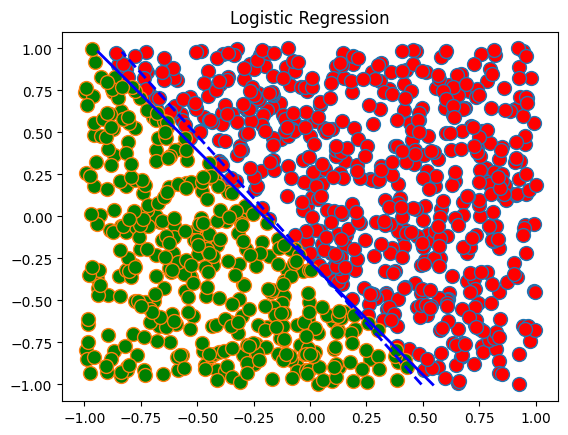

In [27]:
from logistic import logistic
from logistic import sigmoid

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
N = 1000; # number of data
E_train_sum = 0.0
E_test_sum = 0.0

for i in range(nRep):
    X, y, w_f = mkdata(N)
    w_g = logistic(X, y)
    # 划分训练集和测试集
    perm = np.random.permutation(N)
    nTrain = int(0.8 * N)
    idx_tr, idx_te = perm[:nTrain], perm[nTrain:]

    X_train, y_train = X[:, idx_tr], y[:, idx_tr]
    X_test,  y_test  = X[:, idx_te],  y[:, idx_te]
    w_train, w_test = logistic(X_train, y_train), logistic(X_test, y_test)
    #TODO
    # Compute training, testing error
    lable = sigmoid(y_train) >= 0.5
    X_bias = np.vstack((np.ones((1, nTrain)), X_train))   # (P+1) x N
    lable_pred = sigmoid(w_train.T @ X_bias) >= 0.5
    E_train_sum += np.mean((lable_pred != lable))

    X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
    lable_test = sigmoid(y_test) >= 0.5
    lable_test_pred = sigmoid(w_test.T @ X_test_bias) >= 0.5
    E_test_sum += np.mean((lable_test_pred != lable_test))

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.12747500000000003, E_test is 0.13210000000000005


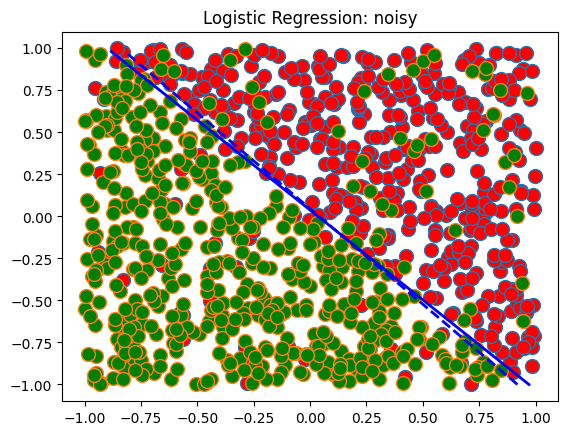

In [30]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
N = 1000; # number of data
E_train_sum = 0.0
E_test_sum = 0.0

for i in range(nRep):
    X, y, w_f = mkdata(N, 'noisy')
    w_g = logistic(X, y)
    # 划分训练集和测试集
    perm = np.random.permutation(N)
    nTrain = int(0.8 * N)
    idx_tr, idx_te = perm[:nTrain], perm[nTrain:]

    X_train, y_train = X[:, idx_tr], y[:, idx_tr]
    X_test,  y_test  = X[:, idx_te],  y[:, idx_te]
    w_train, w_test = logistic(X_train, y_train), logistic(X_test, y_test)
    #TODO
    # Compute training, testing error
    lable = sigmoid(y_train) >= 0.5
    X_bias = np.vstack((np.ones((1, nTrain)), X_train))   # (P+1) x N
    lable_pred = sigmoid(w_train.T @ X_bias) >= 0.5
    E_train_sum += np.mean((lable_pred != lable))

    X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
    lable_test = sigmoid(y_test) >= 0.5
    lable_test_pred = sigmoid(w_test.T @ X_test_bias) >= 0.5
    E_test_sum += np.mean((lable_test_pred != lable_test))

E_train = E_train_sum / nRep
E_test = E_test_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.03375, E_test is 0.03
Average number of support vectors is 3.3.


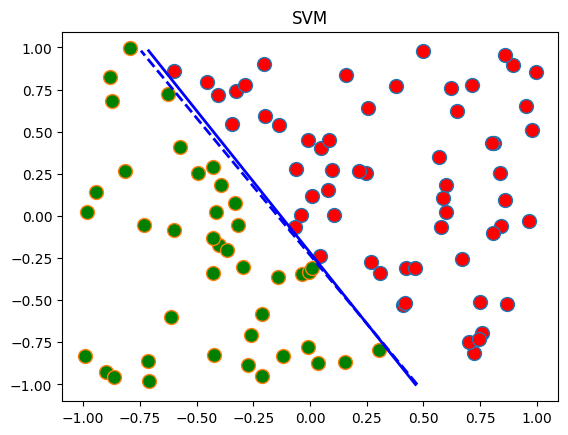

In [36]:
from svm import svm

nRep = 10; # number of replicates
N = 100; # number of data
sum = 0
E_train_sum = 0.0
E_test_sum = 0.0

for i in range(nRep):
    X, y, w_f = mkdata(N)
    w_g, num_sc = svm(X, y)

    # 划分训练集和测试集
    perm = np.random.permutation(N)
    nTrain = int(0.8 * N)
    idx_tr, idx_te = perm[:nTrain], perm[nTrain:]

    X_train, y_train = X[:, idx_tr], y[:, idx_tr]
    X_test,  y_test  = X[:, idx_te],  y[:, idx_te]
    w_train, w_test = logistic(X_train, y_train), logistic(X_test, y_test)
    #TODO
    # Compute training, testing error
    X_bias = np.vstack((np.ones((1, nTrain)), X_train))   # (P+1) x N
    lable = np.sign(y_train)
    lable_pred = np.sign(w_train.T @ X_bias)
    E_train_sum += np.mean((lable_pred != lable))

    X_test_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))
    lable_test = np.sign(y_test)
    lable_test_pred = np.sign(w_test.T @ X_test_bias)
    E_test_sum += np.mean((lable_test_pred != lable_test))

    # Sum up number of support vectors
    sum += num_sc

avgNum = sum / nRep
E_train = E_train_sum / nRep
E_test = E_test_sum / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')